## Description

This dataset simulates transactions from a digital wallet platform similar to popular services like PayTm in India or Khalti in Nepal. It contains 5000 synthetic records of various financial transactions across multiple categories, providing a rich source for analysis of digital payment behaviors and trends.It analyses spending patterns across different product categories
and the effectiveness of cashback and loyalty programs.

importing all libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data and get the information about data.
Functions used :-
read_csv()
info() 

In [3]:
df=pd.read_csv("c:\\Data Science\\Project\\digital_wallet_transactions.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idx                 5000 non-null   int64  
 1   transaction_id      5000 non-null   object 
 2   user_id             5000 non-null   object 
 3   transaction_date    5000 non-null   object 
 4   product_category    5000 non-null   object 
 5   product_name        5000 non-null   object 
 6   merchant_name       5000 non-null   object 
 7   product_amount      5000 non-null   float64
 8   transaction_fee     5000 non-null   float64
 9   cashback            5000 non-null   float64
 10  loyalty_points      5000 non-null   int64  
 11  payment_method      5000 non-null   object 
 12  transaction_status  5000 non-null   object 
 13  merchant_id         5000 non-null   object 
 14  device_type         5000 non-null   object 
 15  location            5000 non-null   object 
dtypes: flo

## Data cleaning

Checking empty cells or null values.
Functions used :-
isna()

In [4]:
print(df.isna().sum())
print(df.isna().sum().sum())

idx                   0
transaction_id        0
user_id               0
transaction_date      0
product_category      0
product_name          0
merchant_name         0
product_amount        0
transaction_fee       0
cashback              0
loyalty_points        0
payment_method        0
transaction_status    0
merchant_id           0
device_type           0
location              0
dtype: int64
0


Checking data contains any duplicate values.
Function used :-
duplicated()

In [5]:
print(df.duplicated())
print(df.drop_duplicates(inplace=True))

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool
None


Drop unwanted columns.

In [6]:
del df['transaction_id']
print(df.head())
del df['merchant_id']
print(df.head())

   idx     user_id  transaction_date product_category  \
0    1  USER_05159  2023-08-19 03:32     Rent Payment   
1    2  USER_07204  2023-08-19 04:37         Gas Bill   
2    3  USER_00903  2023-08-19 05:52       Bus Ticket   
3    4  USER_01769  2023-08-19 06:35    Internet Bill   
4    5  USER_03544  2023-08-19 06:36   Loan Repayment   

                product_name     merchant_name  product_amount  \
0          2BHK Flat Deposit            Airbnb         1525.39   
1  Commercial Gas Connection         Adani Gas         1495.40   
2               Semi-Sleeper    MakeMyTrip Bus         1267.71   
3          4G Unlimited Plan  Airtel Broadband         9202.63   
4              Home Loan EMI         Axis Bank         3100.58   

   transaction_fee  cashback  loyalty_points payment_method  \
0            36.69     19.19             186     Debit Card   
1            28.19     89.99             182            UPI   
2            11.36     95.70             994            UPI   
3       

Change datatype of columns.

In [7]:
df['transaction_date']=df['transaction_date'].astype('datetime64[s]')
df['product_category']=df['product_category'].astype('string')
df['merchant_name']=df['merchant_name'].astype('string')
df['payment_method']=df['payment_method'].astype('string')
df['transaction_status']=df['transaction_status'].astype('string')
df['location']=df['location'].astype('string')
df['device_type']=df['device_type'].astype('string')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype        
---  ------              --------------  -----        
 0   idx                 5000 non-null   int64        
 1   user_id             5000 non-null   object       
 2   transaction_date    5000 non-null   datetime64[s]
 3   product_category    5000 non-null   string       
 4   product_name        5000 non-null   object       
 5   merchant_name       5000 non-null   string       
 6   product_amount      5000 non-null   float64      
 7   transaction_fee     5000 non-null   float64      
 8   cashback            5000 non-null   float64      
 9   loyalty_points      5000 non-null   int64        
 10  payment_method      5000 non-null   string       
 11  transaction_status  5000 non-null   string       
 12  device_type         5000 non-null   string       
 13  location            5000 non-null   string       
dtypes: datet

## Statistical Analysis

Finding relationships using corr() function.

In [8]:
print(df.corr(numeric_only=True))

                      idx  product_amount  transaction_fee  cashback  \
idx              1.000000        0.023803        -0.009800  0.012048   
product_amount   0.023803        1.000000         0.001717  0.005515   
transaction_fee -0.009800        0.001717         1.000000 -0.002113   
cashback         0.012048        0.005515        -0.002113  1.000000   
loyalty_points  -0.006675       -0.001306         0.003036  0.015662   

                 loyalty_points  
idx                   -0.006675  
product_amount        -0.001306  
transaction_fee        0.003036  
cashback               0.015662  
loyalty_points         1.000000  


Find covarience using cov() function.

In [9]:
print(df.cov(numeric_only=True))

                          idx  product_amount  transaction_fee    cashback  \
idx              2.083750e+06    9.913197e+04      -205.628843  496.069571   
product_amount   9.913197e+04    8.323422e+06        72.003691  453.830484   
transaction_fee -2.056288e+02    7.200369e+01       211.274887   -0.875936   
cashback         4.960696e+02    4.538305e+02        -0.875936  813.531123   
loyalty_points  -2.784129e+03   -1.088693e+03        12.750952  129.081203   

                 loyalty_points  
idx                -2784.128826  
product_amount     -1088.692634  
transaction_fee       12.750952  
cashback             129.081203  
loyalty_points     83499.288326  


Retreiving statistical summery of data.

In [10]:
print(df.describe())

               idx     transaction_date  product_amount  transaction_fee  \
count  5000.000000                 5000     5000.000000      5000.000000   
mean   2500.500000  2024-02-19 09:33:10     4957.502722        25.188874   
min       1.000000  2023-08-19 03:32:00       10.090000         0.010000   
25%    1250.750000  2023-11-19 14:07:45     2453.977500        12.665000   
50%    2500.500000  2024-02-20 08:42:30     4943.685000        25.070000   
75%    3750.250000  2024-05-22 07:14:15     7444.815000        37.947500   
max    5000.000000  2024-08-18 01:15:00     9996.950000        49.990000   
std    1443.520003                  NaN     2885.034160        14.535298   

          cashback  loyalty_points  
count  5000.000000     5000.000000  
mean     50.658782      498.790400  
min       0.000000        0.000000  
25%      26.495000      246.000000  
50%      51.390000      504.000000  
75%      75.067500      749.000000  
max     100.000000      999.000000  
std      28.522467 

## Exploratory Data Analysis

1.Which is the most used payment method?

In [11]:
print(df.groupby('payment_method').size().sort_values(ascending=False).head(1))

payment_method
Bank Transfer    1045
dtype: int64


2.Which method of payment costed high compared to other?

In [12]:
print(df['transaction_fee'].max())
a=df['transaction_fee'].idxmax()
b=df.loc[a, 'payment_method']
print("highest fee:",df.loc[a,'transaction_fee'])
print(b)

49.99
highest fee: 49.99
Wallet Balance


3.Which merchant got more cashback?

In [13]:
highest_cashback=df['cashback'].idxmax()
b=df.loc[highest_cashback,'merchant_name']
print("highest cashback:",df.loc[highest_cashback,'cashback'])
print(b)

highest cashback: 100.0
Mumbai Water


4.Who got more points on loyalty?

In [14]:
print(df['loyalty_points'].max())
a=df['loyalty_points'].idxmax()
b=df.loc[a,'merchant_name']
print("highest loyalty point:",df.loc[a,'loyalty_points'])
print(b)

999
highest loyalty point: 999
Bangalore Water Supply


5.How many transactions done in 2023?

In [15]:
transactions_2023 = df[df['transaction_date'].dt.year == 2023]
num_transactions_2023 = len(transactions_2023)
print("Number of transactions in 2023:", num_transactions_2023)

Number of transactions in 2023: 1834


6.How many transactions have failed?

In [16]:
failed=df[df['transaction_status']=='Failed']
num_failed_transactions=len(failed)
print("no. of failed transactions:",num_failed_transactions)

no. of failed transactions: 146


7.How many transactions were successful?

In [17]:
successful=df[df['transaction_status']=='Successful']
num_successful_transactions=len(successful)
print("no. of successful transactions:",num_successful_transactions)

no. of successful transactions: 4755


8.Which type of transaction is more successful?

In [18]:
successful_transactions=df[df['transaction_status']=='Successful']
success_counts = successful_transactions.groupby('payment_method').size()
most_successful_type = success_counts.idxmax()
print("Most successful transaction type:", most_successful_type)

Most successful transaction type: Bank Transfer


9.Which is the most used device for transaction?

In [19]:
print(df['device_type'].max())

iOS


10.Percentage of pending transactions?

transaction_status
Successful    4755
Failed         146
Pending         99
Name: count, dtype: Int64
transaction_status
Successful    95.1
Failed        2.92
Pending       1.98
Name: count, dtype: Float64


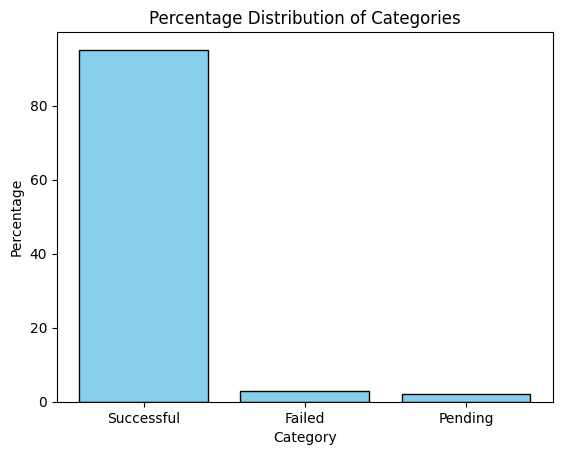

In [20]:
count=df['transaction_status'].value_counts()
print(count)
percentage=(count/len(df))*100
print(percentage)
plt.bar(percentage.index, percentage, color='skyblue', edgecolor='black')
plt.title('Percentage Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.show()

11.What is the average transaction fee across all transactions?

In [21]:
average=df['transaction_fee'].mean()
print("average transaction fee is:",average)

average transaction fee is: 25.188874


12.What is the correlation between product amount and cashback?

In [22]:
correlation=df['product_amount'].corr(df['cashback'])
print("correlation is:",correlation)

correlation is: 0.005515128285459528


13.How do transaction amounts compare between successful and failed transactions?

                           mean    median          std    min      max  count
transaction_status                                                           
Failed              5044.593767  5238.395  2992.291185  13.33  9993.54    146
Pending             4969.535354  4770.050  2951.919373  75.86  9952.88     99
Successful          4954.578111  4944.250  2880.868656  10.09  9996.95   4755


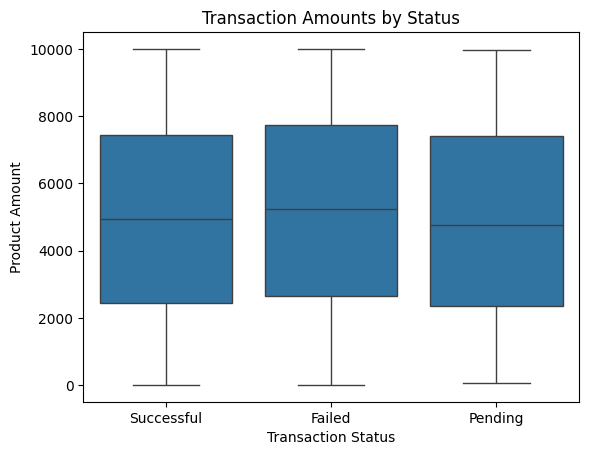

In [23]:
comparison = df.groupby('transaction_status')['product_amount'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
print(comparison)
sns.boxplot(data=df, x='transaction_status', y='product_amount')
plt.title('Transaction Amounts by Status')
plt.xlabel('Transaction Status')
plt.ylabel('Product Amount')
plt.show()

14.How much people used debit card for transactions?

In [27]:
value_counts = df['payment_method'].value_counts()
print(value_counts)
debit_card_count = (df['payment_method'] == 'debit card').sum()
print(debit_card_count)

payment_method
Bank Transfer     1045
Debit Card        1022
UPI                999
Credit Card        992
Wallet Balance     942
Name: count, dtype: Int64
0


15.Which is the most bought product category?

In [ ]:
print(df['product_category'].max())

Water Bill


16.Who made less transactions?

In [ ]:
print(df['merchant_name'].min())

ACT Fibernet


17.Are there any locations with significantly fewer transactions?

location with fewer transactions is: location
Rural    498
Name: count, dtype: Int64
location
Urban       3485
Suburban    1017
Rural        498
Name: count, dtype: Int64


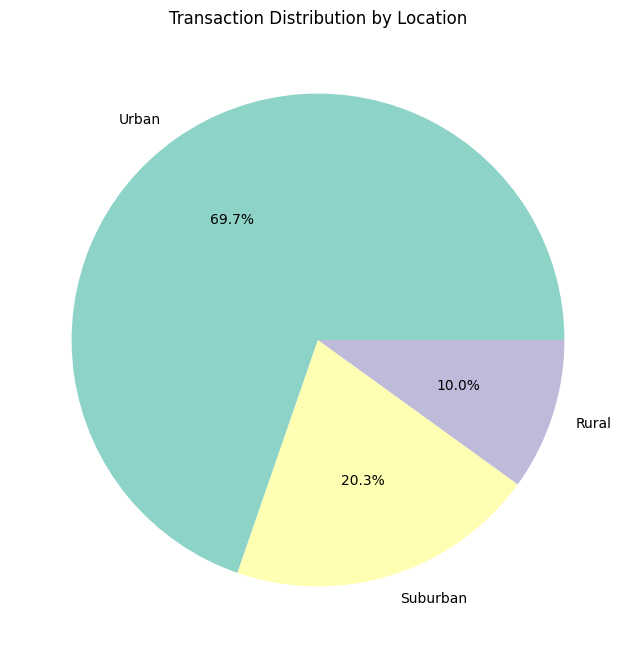

In [ ]:
location_distribution = df['location'].value_counts().sort_values().head(1)
print("location with fewer transactions is:",location_distribution)
location_distribution = df['location'].value_counts()
print(location_distribution)
plt.figure(figsize=(8, 8))
location_distribution.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3', len(location_distribution)))
plt.title('Transaction Distribution by Location')
plt.ylabel('')
plt.show()

18.Which location has the most transactions?

location with more transactions:
location
Urban    3485
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_8676\875913895.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


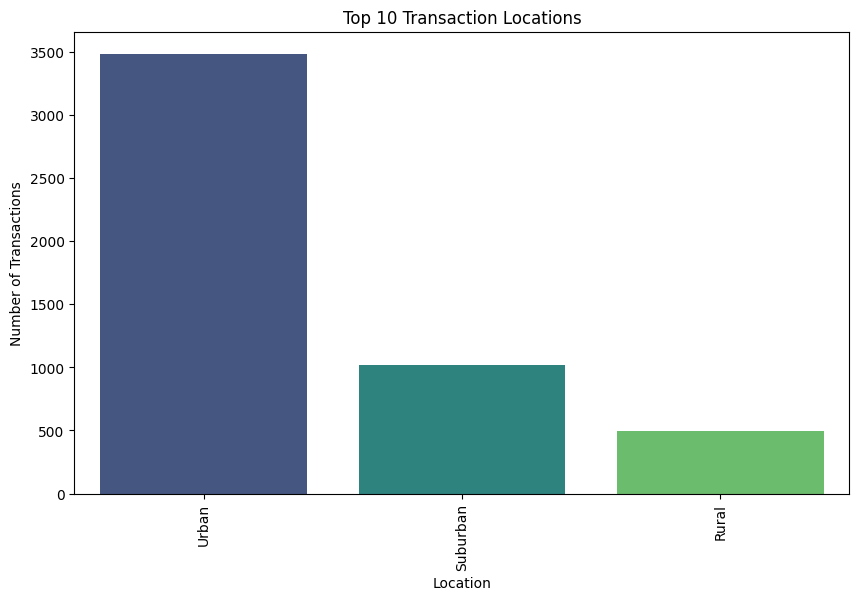

In [ ]:
print("location with more transactions:")
print(df.groupby('location').size().sort_values(ascending=False).head(1))
top_locations = location_distribution.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')
plt.title('Top 10 Transaction Locations')
plt.xlabel('Location')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

## Summery

* Bank transfer is the most favourable payment method among customers.
* Wallet balance is the kind of digital transaction which had more transaction fee compared to other payment methods.
* The merchant who got more cashback is Mumbai Water.
* Banglore water supply has more loyalty points.
* No. of tranactions in 2023: 1834.
* No. of failed transactions : 146.
* 4755 Transactions were successful.
* Bank transfer is the most successful type of payment method.
* No.of people who used debit card for transactions :- 1022
* People made more transactions under water bill catogory.
* The merchant who made less transactions is "ACT Fiber net". 
* Transactions on rural areas are comparatively less.
* More transactions are from urban area.